#A Single Neuron with Sigmoid Activation Function

You will implement a neuron with a set of inputs and weights associated with them. Instead of just getting the linear product, you will give it to sigmoid function to get outputs between 0 and 1.

**You will learn to:**
- Initializing parameters
- Calculating the cost function and its gradient
- Using an optimization algorithm (gradient descent)
- Gather all three functions above into a main model function.

**Before submitting your assignment:**
- Do not use loops (for/while) in your code.
- Make sure you have not changed the assignment code where it is not required.
You are only supposed to write code between
#### #YOUR CODE STARTS HERE
...
...
#### #YOUR CODE ENDS HERE
and create the variables you are asked to.


##Files and Connecting to Google Drive##

In this assignment you are supposed to use the dataset files <code>train_catvnoncat.h5</code> and <code>test_catvnoncat.h5</code>. If you are using Google Colab, then put these files into your Drive folder and use the following lines to connect to your Drive folder. Once you do that -as long as you write the path correctly- you will be able to reach the files.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/"

 16052340_9_a_snflistesi-1.zip
 1st_Release.gdoc
'Adsız doküman.gdoc'
 ANALİTİK GEOMETRİ KONU ANLATIM _20180928120558.pdf
'Başlıksız form (1).gform'
'Başlıksız form (2).gform'
'Başlıksız form (3).gform'
'Başlıksız form.gform'
 Beslenme.pdf
'Bir Günlük Örnek Beslenme Programı.pdf'
 boardingpass_1426927711400.pdf
'Buse ile Yurtdışına gidiyozzzz.gsheet'
 CENG111PROJECT.php
 ceng113_hw4_270201017.py
'CENG 318 Cloud LMS Survey.gform'
'Colab Notebooks'
'Competitive Coding Ekibi Formu dosyasının kopyası.gform'
'Competitive Coding Ekibi Formu.gform'
'CS Toplantı Notları.gdoc'
'CV_EU_Kutay_OZBAY_ENG (1).pdf'
'CV_EU_Kutay_OZBAY_ENG (2).pdf'
'CV_EU_Kutay_OZBAY_ENG (3).pdf'
'CV_EU_Kutay_OZBAY_ENG (4).pdf'
'CV_EU_Kutay_OZBAY_ENG (5).pdf'
 CV_EU_Kutay_OZBAY_ENG.gdoc
 CV_EU_Kutay_OZBAY_ENG.pdf
 CV_Kutay_OZBAY_ENG.pdf
 Dekont.pdf
'ERKEK ÖĞRENCİ BARINMA SÖZLEŞMESİ 2019-2020.pdf'
'Film Listesi.gsheet'
 Fotoğraflar
'Fundamentals of Physics Textbook ( PDFDrive.com ).pdf'
'Google Earth'


<a name='1'></a>
## 1 - Packages ##

In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py  # a common package to interact with a dataset that is stored on an H5 file
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
%load_ext autoreload
#%reload_ext autoreload

In [ ]:
train_dataset = h5py.File('/content/drive/MyDrive/Colab Notebooks/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('/content/drive/MyDrive/Colab Notebooks/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

<a name='2'></a>
## 2 - Understanding the Dataset and Preprocessing ##

**Problem Statement**: You are given a dataset containing:
- a training set of *m_train* images labeled as cat (y=1) or non-cat (y=0)
- a test set of *m_test* images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will name them differently (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images.

y = [0], it's a 'non-cat' picture.
(209, 64, 64, 3)
(50, 64, 64, 3)


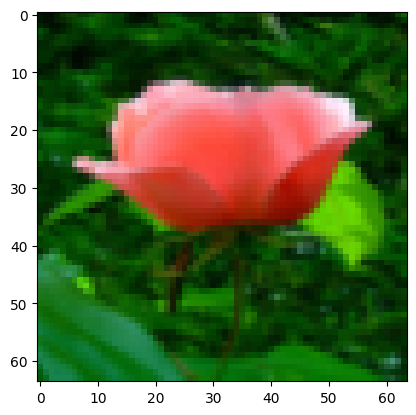

In [ ]:
# Example picture
index = 3
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

print(train_set_x_orig.shape)
print(test_set_x_orig.shape)

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs.

<a name='ex-1'></a>
### Exercise 1
Find the values for:
- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)

Remember that you can access shape of *a* by writing `a.shape[0]`,`a.shape[1]` etc.

In [ ]:
#(≈ 3 lines of code)
# m_train = ..
# m_test = ..
# num_px = ..
# YOUR CODE STARTS HERE

m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))


Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**Expected Output for m_train, m_test and num_px**:
<table style="width:15%">
  <tr>
    <td> m_train </td>
    <td> 209 </td>
  </tr>
  
  <tr>
    <td>m_test</td>
    <td> 50 </td>
  </tr>
  
  <tr>
    <td>num_px</td>
    <td> 64 </td>
  </tr>
  
</table>


<a name='ex-2'></a>
### Exercise 2
To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step for picture datasets is converting the pixel values into [0,1] range. You can simply divide all pixel values by 255 since 255 is the highest value in 8-bit images. After this step, please check your train and test set images' values if they are between 0 and 1.

In [ ]:
# Using broadcasting you can divide a matrix by 255 all at once
# (2 lines of code)
# train_set_x_norm = ..
# test_set_x_norm = ..
# YOUR CODE STARTS HERE

broadcast_value = 255

train_set_x_norm = train_set_x_orig / broadcast_value

test_set_x_norm = test_set_x_orig / broadcast_value

# Visulazing print(train_set_x_orig[0][0])

# Visulazing print(train_set_x_norm[0][0])

# YOUR CODE ENDS HERE

For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns after flattening.


In [ ]:
print(train_set_x_norm.shape)
train_set_x_flatten = train_set_x_norm.reshape(train_set_x_norm.shape[0], -1).T
print(train_set_x_flatten.shape)
print(test_set_x_norm.shape)
test_set_x_flatten = test_set_x_norm.reshape(test_set_x_norm.shape[0], -1).T
print(test_set_x_flatten.shape)

(209, 64, 64, 3)
(12288, 209)
(50, 64, 64, 3)
(12288, 50)


<a name='3'></a>
## 3 - General architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression. The following Figure explains why **Logistic Regression is actually a neuron with sigmoid activation function**

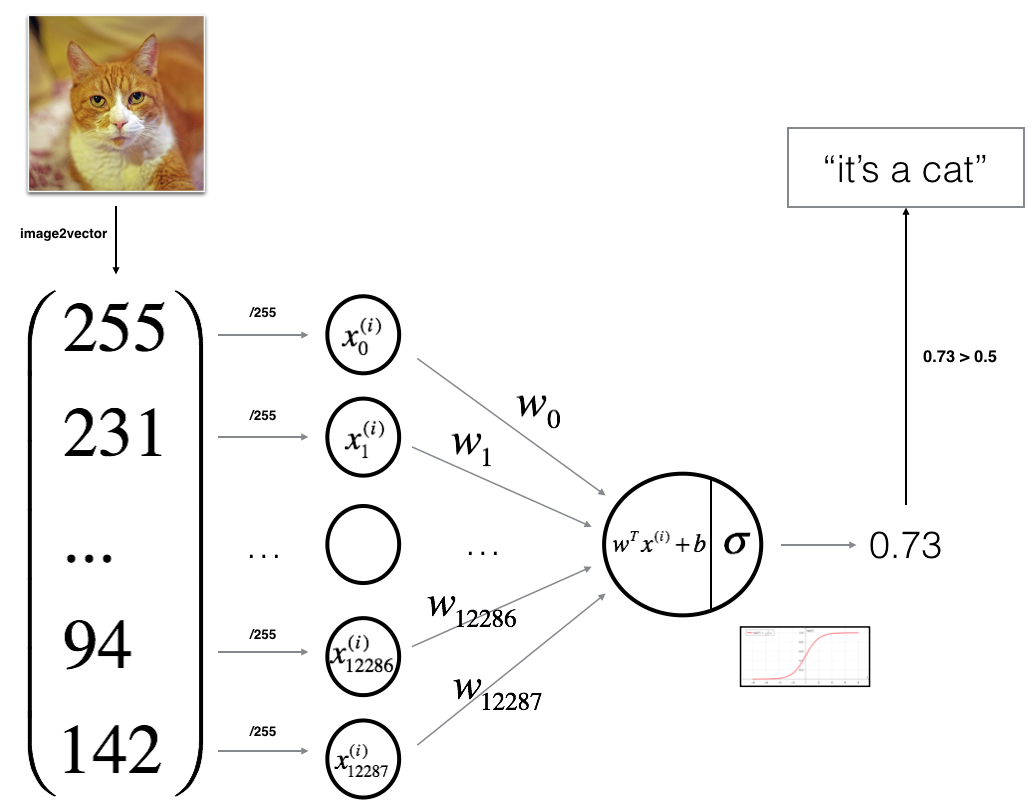

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps:

- Initialize the parameters of the model

- Learn the parameters for the model by minimizing the cost  

- Use the learned parameters to make predictions (on the test set)

- Analyse the results and conclude

<a name='4'></a>
## 4 - Building the parts of our algorithm ##

The main steps are:
1. Initialize the model's parameters
2. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

Later we integrate them into one function we call `model()`.

### Helper function: sigmoid

We will use the following implementation of `sigmoid()`. As you've seen in the figure above, $sigmoid(z) = \frac{1}{1 + e^{-z}}$.

In [ ]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

<a name='4-1'></a>
### 4.1 - Initializing parameters

<a name='ex-3'></a>
### Exercise 3 - initialize_with_zeros
When you are given a dataset, you should create an array of weights that matches the size of input (not the whole dataset but a flattened image input). Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. Hint: check the function np.zeros() in the Numpy library's documentation.

In [ ]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(X_train):

    """
    This function creates a vector of zeros of shape (length,1) for w and initializes b to 0.

    Argument:
    X_train -- is the matrix belongs to training set -- of size (num_px * num_px * 3, number of examples)
    size of the w vector we want should be extracted (should match to one flattened image)

    Returns:
    w -- initialized vector
    b -- initialized scalar (corresponds to the bias) of type float
    """

    # first determine what is the length of w vector, then initialize the vector by 0.
    # (1-2 lines of code)
    # w = ...
    # YOUR CODE STARTS HERE
    w = np.zeros((len(X_train), 1))
    # YOUR CODE ENDS HERE

    b = float(0)

    return w, b

In [ ]:
w, b = initialize_with_zeros(train_set_x_flatten)

#assert type(b) == float
print ("w's shape = " + str(w.shape[0])+"x"+str(w.shape[1]))
print ("w = " + str(w))
print ("b = " + str(b))


w's shape = 12288x1
w = [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
b = 0.0


**Expected Output for w's shape is 12288x1**

<a name='4-2'></a>
### 4.2 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

<a name='ex-4'></a>
### Exercise 4 - propagate
Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [ ]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Do not use for loops, use np.log(), np.dot()
    """
    m = X.shape[1]
    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication.
    # And don't use loops for the sum.
    # cost = ...
    # YOUR CODE STARTS HERE

    A = sigmoid(np.dot(w.T,X)+b)
    cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))

    # YOUR CODE ENDS HERE
    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE

    dw = (1/m) * np.dot(X, np.transpose(A - Y))
    db = (1/m) * np.sum(A - Y)

    # YOUR CODE ENDS HERE

    cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [ ]:
w = np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])


grads, cost = propagate(w, b, X, Y)
assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64

print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))


dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405


**Expected output**

```
dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405
```

<a name='4-3'></a>
### 4.3 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $w_i$, the update rule is $ w_i = w_i - \alpha \text{ } d w_i$, where $\alpha$ is the learning rate.

#### Helper function: optimize()

In [ ]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    1) It calculates the cost and the gradient for the current parameters, using propagate().
    2) It updates the parameters using gradient descent rule for w and b

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update
        w = w - learning_rate*dw
        b = b - learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=200, learning_rate=0.009, print_cost=False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs)) #one value per 100 iterations


w = [[0.67044124]
 [2.08912561]]
b = 1.6640310356519064
dw = [[ 0.13448972]
 [-0.03768598]]
db = -0.066776702729405
Costs = [array(0.15900538), array(0.10541138)]


<a name='ex-5'></a>
### Exercise 5 - predict
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $A = \sigma(w^T X + b)$

2. Convert the entries of $A$ into 0 (if activation <= 0.5) or 1 (if activation > 0.5), store the predictions in a vector `Y_prediction`. (Try to complete this task without a for/while loop).

In [ ]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) shape of (1,m) where m is the no of samples in X
                    containing all predictions (0/1) for the samples in X
    '''

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE

    A = sigmoid(np.dot(w.T,X) + b)

    # YOUR CODE ENDS HERE

    # Initialize an array Y_prediction with shape of (1,m) where m is the no of samples in X
    # Convert probabilities A to actual predictions (0 or 1) and fill Y_prediction with these.
    # Try not to use for/while loop for that, there is a way to vectorize this.
    # (2-3 lines of code)
    # Y_prediction =
    # YOUR CODE STARTS HERE

    Y_prediction = (A >= 0.5) * 1


    # YOUR CODE ENDS HERE

    return Y_prediction


In [ ]:
w = np.array([[0.1124579], [0.23106775]])   #(2,1)
b = -0.3
X = np.array([[1., -1.1, -3.2, 1.9],[1.2, 2., 0.1, 0.9]])  #(2,4)

print ("predictions = " + str(predict(w, b, X)))


predictions = [[1 1 0 1]]


**Expected output: predictions = [1 1 0 1]**

<a name='5'></a>
## 5 - Merge all functions into a model ##

You will now see how the overall <code>model</code> is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train)
    # optimize
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    # Retrieve parameters w and b from dictionary "params"
    w = params["w"]
    b = params["b"]
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

Now, run the following cell to train your model.

In [ ]:
logistic_regression_model = model(train_set_x_flatten, train_set_y, test_set_x_flatten, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


Comment: Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data. Test accuracy is 70%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. But no worries, you'll build an even better classifier next week!

Also, you see that the model is clearly overfitting the training data. Later in this specialization you will learn how to reduce overfitting, for example by using regularization. Using the code below (and changing the `index` variable) you can look at predictions on pictures of the test set.

y = 1, you predicted that it is a "non-cat" picture.


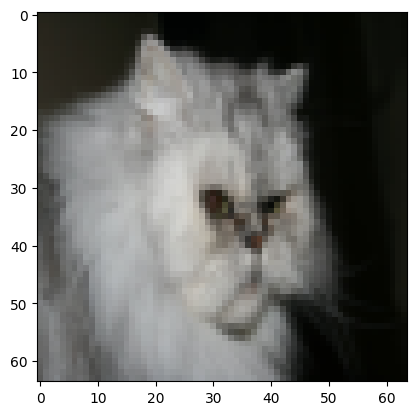

In [ ]:
# Example of a picture that was wrongly classified.
index = 10
plt.imshow(test_set_x_flatten[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

Let's also plot the cost function and the gradients.

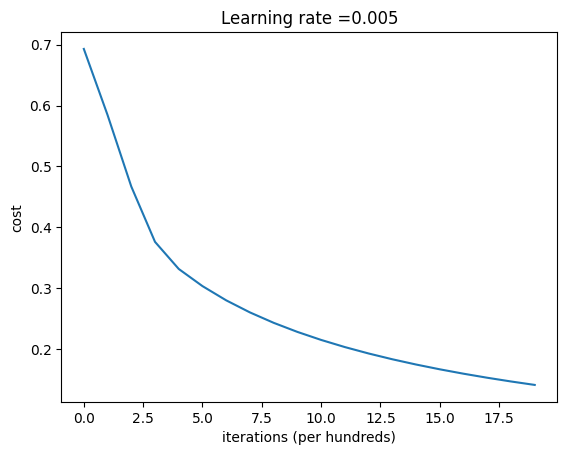

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting.

<a name='6'></a>
## 6 - Test with your own image ##

<a name='ex-6'></a>
### Exercise 6 - Test an image of your own

- Take any image, or get one from Internet. It may or may not be a cat image.
- Add your image to this Notebook's directory, in the "images" folder preferably
- Change your image's name in the following code
- Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

y = 0, your algorithm predicts a "non-cat" picture.


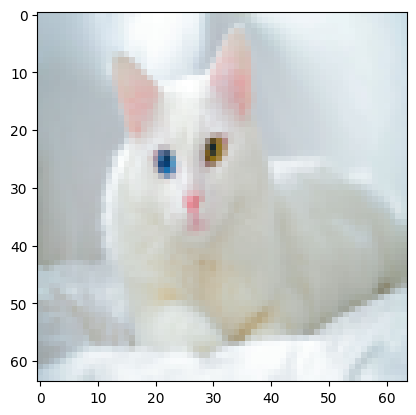

In [ ]:
# change this to the name of your image file
my_image = "/content/drive/MyDrive/Colab Notebooks/cat3.jpg"

#https://www.google.com/search?q=cat+p&sxsrf=APwXEddMQYaFydTgLFo21p-RpjulLOOTkA:1680293748659&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiZ9oaA_ob-AhW2avEDHTHgCakQ_AUoAXoECAEQAw&biw=1536&bih=754&dpr=1.25#imgrc=yyr_zAmgsiiObM

# We preprocess the image to fit your algorithm.
fname = my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")